# Лабортарная работа №2

## Салятов Сергей, Подосенов Андрей, M3337

### Задание 1

$$
f_{\theta}(x) = \frac{1}{(k-1)! \theta^k} x^{k - 1} e^{-\frac{x}{\theta}} \mathbf{1}_{\{x > 0\}}
$$

Это Гамма-распределение (a=k, scale=theta) для *scipy.stats*

### Вывод формул

#### Оценка $\theta$

Теоретический первый момент (математическое ожидание) Гамма-распределения равен:

$$
E[X] = k \theta
$$

По методу моментов приравниваем теоретическое матожидание к эмпирическому момменту:

$$
 \overline{X} = E[X] = k {\theta}
$$

Так как $k$ считаем известным, то находим отсюда $\hat{\theta}$: 
$$
\hat{\theta} = \frac{\overline{X}}{k}
$$

#### Смещение

Находим математическое ожидание оценки ($E[\overline{X}] = k \theta$ в силу несмещённости моментов):

$$
E[\hat{\theta}] = E \left[ \frac{\overline{X}}{k} \right] = \frac{E[\overline{X}]}{k} = \frac{k \theta}{k} = \theta
$$

Находим смещение:

$$
bias(\hat{\theta}) = E[\hat{\theta}] - \theta = \theta - \theta = 0
$$

#### Дисперсия

Теперь распишем дисперсию оценки:

$$
Var(\hat{\theta}) = Var \left( \frac{\overline{X}}{k} \right) = \frac{Var(\overline{X})}{k^2}
$$

Дисперсия суммы равна сумме дисперсий для незавсимых величин, а теоретическая дисперсия гамма-распределения равна $k\theta^2$

$$
Var(\overline{X}) = Var \left( \frac{1}{n} \sum_{i=1}^{n} X_i \right) = \frac{1}{n^2} \sum_{i=1}^{n} Var(X_i) = \frac{1}{n^2} \cdot n \cdot Var(X_1) = \frac{Var(X)}{n} = \frac{k\theta^2}{n}
$$

Подставляем:

$$
Var(\hat{\theta}) = \frac{k\theta^2}{nk^2} = \frac{\theta^2}{nk}
$$

#### Среднеквадратическая ошибка (MSE)

Находим $MSE(\hat{\theta})$:

$$
MSE(\hat{\theta}) = Var(\hat{\theta}) + bias^2(\hat{\theta}) = \frac{\theta^2}{nk}
$$

То есть среднеквадратическая ошибка равна дисперсии, так как смещение равно нулю

### Свойства оценки:

- Несмещена ($bias = 0$)
- Состоятельна

    По неравенству Чебышёва имеем: 
    $$
    P(|\hat{\theta} - \theta| \geqslant \epsilon) \leqslant \frac{Var(\hat{\theta})}{\epsilon^2} = \frac{\theta^2}{nk\epsilon^2} \rightarrow 0, n \rightarrow \infty 
    $$
- Эффективна

    Оценим дисперсию снизу по неравенству Рао-Крамера для несмещённых оценок:

    $$
    Var(\hat{\theta}) \geqslant \frac{1}{I_n(\theta)}
    $$
    где $I_n(\theta)$ - информация Фишера

    Теперь посчитаем информацию Фишера

    Для независимых случайных величин функция правдоподобия будет являться произведением плотностей:

    $$
    L(\theta) = \prod_{i=1}^{n} f(x_i | \theta) =  \prod_{i=1}^{n} \left[ \frac{1}{(k-1)! \theta^k} x_i^{k-1} e^{-\frac{x_i}{\theta}} \right]
    $$

    Прологарифмируем это:

    $$
    \ln L(\theta) = \sum_{i=1}^n \left[ -\ln (k-1)! - k \ln \theta + (k-1) \ln x_i - \frac{x_i}{\theta} \right] 
    $$

    Упрощаем:

    $$
    \ln L(\theta) = -n \ln (k-1)! - nk \ln \theta + (k-1) \sum_{i=1}^n \ln x_i - \frac{1}{\theta} \sum_{i=1}^n x_i
    $$

    Теперь возьмём первую и вторую производные по $\theta$:

    $$
    \frac{\partial}{\partial \theta} \ln L(\theta) = -\frac{nk}{\theta} + \frac{1}{\theta^2} \sum_{i=1}^n x_i
    $$

    $$
    \frac{\partial^2}{\partial \theta^2} \ln L(\theta) = \frac{nk}{\theta^2} - \frac{2}{\theta^3} \sum_{i=1}^n x_i
    $$

    Теперь вычисляем информацию Фишера:

    $$
    I_n(\theta) = E \left[ \left( \frac{\partial}{\partial \theta} \ln L(\theta) \right)^2 \right] = - E \left[ \frac{\partial^2}{\partial \theta^2} \ln L(\theta) \right] = E \left[ \frac{2}{\theta^3} \sum_{i=1}^n x_i - \frac{nk}{\theta^2} \right]
    $$

    Далее по линейности математического ожидания и $E[X_i] = k\theta$ получаем:

    $$
    I_n(\theta) = \frac{2}{\theta^3} \sum_{i=1}^n E[X_i] - \frac{nk}{\theta^2} =  \frac{2 n k \theta}{\theta^3} - \frac{nk}{\theta^2} = \frac{nk}{\theta^2}
    $$

    То есть оценка снизу для дисперсии:
    
    $$Var(\hat{\theta}) \geqslant \frac{\theta^2}{nk}$$

    Так как для нашей оценки достигается равенство, то оценка эффективна в силу равенства наименьшей возможной дисперсии

- Асимптотически нормальна

    Буквально записываем ЦПТ и получаем то, что нужно

### Эксперимент 

Теперь проведём эксперимент, сравнив эмпирическую оценку с действительным значением для случая $\theta = 2, k = 3$

Результаты эксперимента:
n	Bias		Var(θ̂)		MSE		Theor Var	Outside Thr
10	0.009554	0.138283	0.138236	0.133333	602/1000
30	-0.005050	0.040693	0.040678	0.044444	325/1000
50	-0.005051	0.028071	0.028069	0.026667	238/1000
100	0.008192	0.013555	0.013608	0.013333	80/1000
500	0.001514	0.002587	0.002587	0.002667	0/1000
1000	0.001763	0.001408	0.001410	0.001333	0/1000


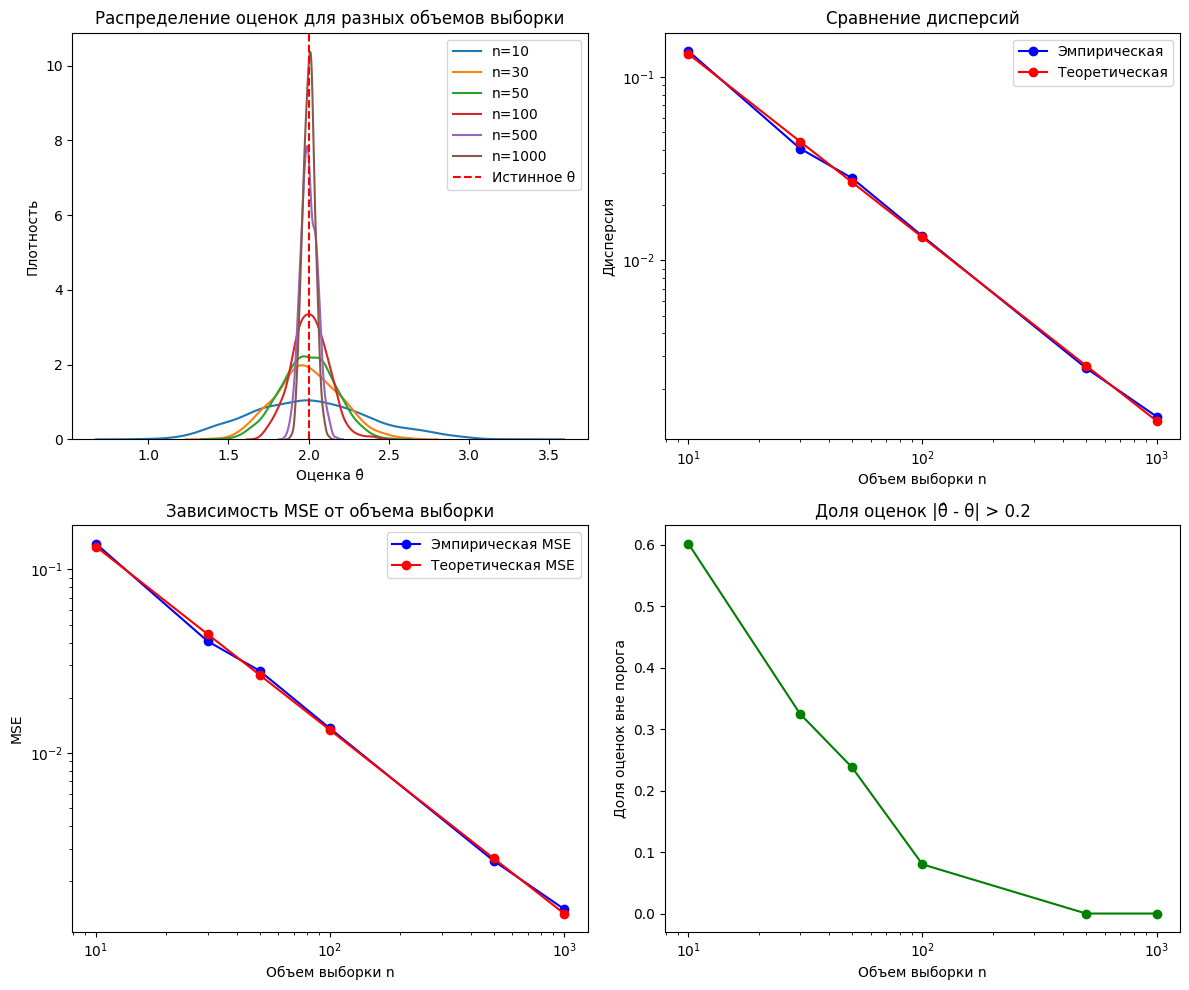

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma

theta_true = 2
k = 3
sample_sizes = [10, 30, 50, 100, 500, 1000]
m = 1000

threshold = 0.1 * theta_true

results = {}

for n in sample_sizes:
    estimates = []
    errors = []
    
    for _ in range(m):
        sample = gamma.rvs(a=k, scale=theta_true, size=n)
        
        theta_hat = np.mean(sample) / k
        estimates.append(theta_hat)
        errors.append(theta_hat - theta_true)
    
    results[n] = {
        'estimates': np.array(estimates),
        'errors': np.array(errors),
        'bias': np.mean(errors),
        'variance': np.var(estimates, ddof=1),
        'mse': np.mean(np.array(errors)**2),
        'outside_threshold': np.sum(np.abs(errors) > threshold)
    }

theoretical_variance = theta_true**2 / (k * np.array(sample_sizes))
theoretical_mse = theoretical_variance

print("Результаты эксперимента:")
print("n\tBias\t\tVar(θ̂)\t\tMSE\t\tTheor Var\tOutside Thr")
for n in sample_sizes:
    r = results[n]
    print(f"{n}\t{r['bias']:.6f}\t{r['variance']:.6f}\t{r['mse']:.6f}\t"
          f"{theta_true**2/(k*n):.6f}\t{r['outside_threshold']}/{m}")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for n in sample_sizes:
    sns.kdeplot(results[n]['estimates'], label=f'n={n}', ax=axes[0,0])
axes[0,0].axvline(theta_true, color='red', linestyle='--', label='Истинное θ')
axes[0,0].set_xlabel('Оценка θ̂')
axes[0,0].set_ylabel('Плотность')
axes[0,0].set_title('Распределение оценок для разных объемов выборки')
axes[0,0].legend()

empirical_vars = [results[n]['variance'] for n in sample_sizes]
axes[0,1].plot(sample_sizes, empirical_vars, 'bo-', label='Эмпирическая')
axes[0,1].plot(sample_sizes, theoretical_variance, 'ro-', label='Теоретическая')
axes[0,1].set_xlabel('Объем выборки n')
axes[0,1].set_ylabel('Дисперсия')
axes[0,1].set_title('Сравнение дисперсий')
axes[0,1].legend()
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')

empirical_mse = [results[n]['mse'] for n in sample_sizes]
axes[1,0].plot(sample_sizes, empirical_mse, 'bo-', label='Эмпирическая MSE')
axes[1,0].plot(sample_sizes, theoretical_mse, 'ro-', label='Теоретическая MSE')
axes[1,0].set_xlabel('Объем выборки n')
axes[1,0].set_ylabel('MSE')
axes[1,0].set_title('Зависимость MSE от объема выборки')
axes[1,0].legend()
axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')

outside_ratio = [results[n]['outside_threshold']/m for n in sample_sizes]
axes[1,1].plot(sample_sizes, outside_ratio, 'go-')
axes[1,1].set_xlabel('Объем выборки n')
axes[1,1].set_ylabel('Доля оценок вне порога')
axes[1,1].set_title(f'Доля оценок |θ̂ - θ| > {threshold}')
axes[1,1].set_xscale('log')

plt.tight_layout()
plt.show()